### NAMAGIRI LAKSHMI TB

## TASK 1

# ***Problem Statement***
Predict the percentage of an student based on the number of study hours.

### Organisation: **THE SPARKS FOUNDATION**

## SETTING THE DIRECTORY FOR GOOGLE COLAB.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#setting project path
import os
os.chdir('/content/drive/My Drive')

In [3]:
#to check if the current working directory is same as mentioned above
path = os.getcwd()
print(path)

/content/drive/My Drive


In [13]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# libraries for model evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns


In [5]:
#READING OUR DATASET
scores_df=pd.read_csv("/content/drive/MyDrive/student_scores - student_scores.txt")

In [7]:
#by default it shows the first five rows, using head(15) as i wish to see more.
scores_df.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
#to check the shape of the dataset
scores_df.shape

(25, 2)

our dataset consists of 25 rows and 2 columns.

In [57]:
#checking the information of the dataset
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
#to check for null values
scores_df.isna().sum()

Hours     0
Scores    0
dtype: int64

We notice that we do not have null values present.

In [11]:
scores_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The high correlation betwwen hours and scores indicates that the variable **hours** is a good predictor of variable **scores**

## **Visulaizations**

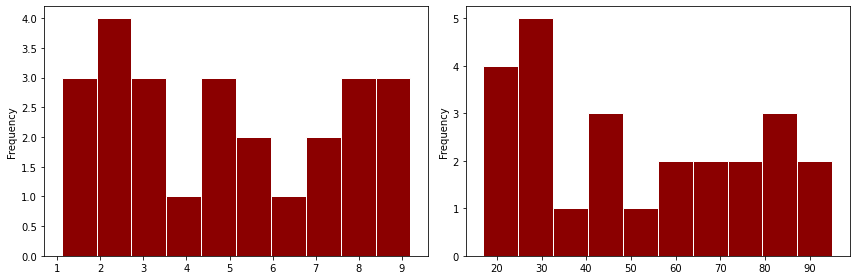

In [24]:
#Visualizing numeric variables – histograms
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
scores_df['Hours'].plot.hist(bins=10,color='darkred',edgecolor='white')
plt.subplot(1, 2, 2)
scores_df['Scores'].plot.hist(bins=10,color='darkred',edgecolor='white')
plt.tight_layout()

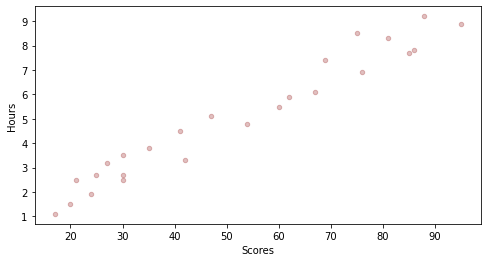

In [25]:
#Visualizing relationships – scatterplots
scores_df.plot.scatter(y='Hours',x='Scores',color='darkred',alpha=0.25,figsize=(8,4))

From the above visualization we can conclude that they are linearly related.

## **SPLITTING THE DATA INTO TRAIN AND TEST SET**

In [28]:
#X being the independant variable and y is the depedant variable
X = scores_df.iloc[:, :-1].values
y = scores_df.iloc[:, 1].values

In [29]:
X.shape
y.shape
print("shape of X is:",X.shape)
print("shape of y is:",y.shape)

shape of X is: (25, 1)
shape of y is: (25,)


In [30]:
# splitting the dataset into train and test set in the ratio 80:20, 80 for training and 20 for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
#checking the shape of X-train and y_train
X_train.shape
y_train.shape
print("shape of X_train is:",X_train.shape)
print("shape of y_train is:",y_train .shape)

shape of X_train is: (20, 1)
shape of y_train is: (20,)


In [34]:
#checking the shape of X_test and y_test
X_test.shape
y_test.shape
print("shape of X_test is:",X_test.shape)
print("shape of y_test is:",y_test.shape)

shape of X_test is: (5, 1)
shape of y_test is: (5,)


In [35]:
#Training the model
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
b1=lr.coef_
print(b1)

[9.91065648]


In [48]:
b0=lr.intercept_
print(b0)

2.018160041434662


In [42]:
#pritning accuracy of the model on trsin data
lr.score(X_train,y_train)

0.9515510725211553

In [41]:
#printing accuracy of the model of test data
lr.score(X_test, y_test)

0.9454906892105354

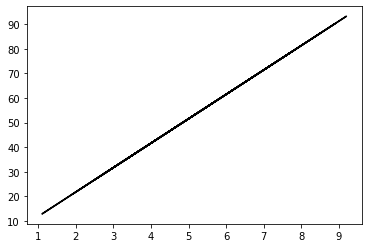

In [59]:
#plotting Linear Relationship between feature and target , b1 as slope and bo as y -intercept
plt.plot(X_train,b1*X_train+b0,color="black")

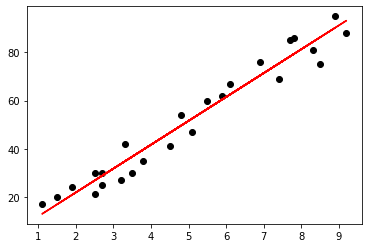

In [58]:
#VISULAIZING THE CO-EFFICIENT AND INTERCEPT
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y,color="black")
plt.plot(X, line,color="red");
plt.show()

We notice the model has performed really well with with an accuracy of **95%** on train data and accuracy of **94.54%** on test data, the model if not overfitting.

In [53]:
#model evaluation
y_pred =lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)


21.598769307217456


LESSER THE MSE VALUE BETTER THE MODEL. BUT HERE SINCE I HAVE USED ONLY ONE MODEL,CAN'T COMPARE.

In [61]:
y_pred = lr.predict(X_test)
#comparing actual vs predicted
ActualVsPred= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ActualVsPred


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


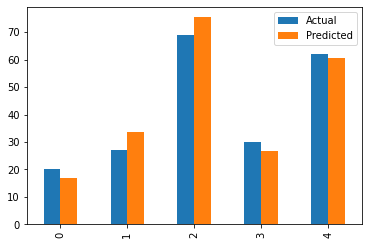

In [63]:
ActualVsPred.plot(kind="bar")

The model has predicted well,almost correct as our accuracy is around 95%(rounded off)

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [54]:
#predicting result for single value
single_result=lr.predict([[9.25]])
print(single_result)

[93.69173249]


We can conclude that if the student studies for 9.25 hours he can achieve 93.69%

**FINAL CONCLUSION**

•	Our dataset has 2 columns, Hours and Scores.

•	Shape of our dataset is (25,2), has 25 rows and 2 columns

•	There are no null values present in our dataset

•	Hours and Scores columns are highly correlated.

•	These two variables are linearly dependant.

•	By using linear regression, we are able to achieve an accuracy of 95% on the train data and 94.54% on test data.

•	While comparing the accuracies of train and test data we can conclude that our model is not over fitting.

•	If a student studies for 9.25 hours he will be able to achieve 93.69%, greater the duration of study better the score.



















